In [1]:
import numpy as np
import math

from graspy.simulations import er_corr, sbm, sbm_corr
import random
import timeit
from par_gmp import GraphMatch
from graspy.match import GraphMatch as GMP

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
np.random.seed(8888)
directed = False
loops = False
n_per_block = 50
n_blocks = 3
block_members = np.array(n_blocks * [n_per_block])
n_verts = block_members.sum()
rho = 0.5
block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])

In [ ]:
# run GMP in serial
A1, A2 = sbm_corr(block_members, block_probs, rho, directed=directed, loops=loops)
# shuffle for testing
node_shuffle_input = np.random.permutation(n_verts)
A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
node_unshuffle_input = np.array(range(n_verts))
node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

In [ ]:
results=dict()
for i in range(20):
    np.random.seed(8888)
    n_per_block = 50
    n_blocks = 3
    block_members = np.array(n_blocks * [n_per_block])
    n_verts = block_members.sum()
    block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])
    _, A2 = sbm_corr(block_members, block_probs, 0.5, directed=False, loops=False)
    # shuffle for testing
    node_shuffle_input = np.random.permutation(n_verts)
    A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
    node_unshuffle_input = np.array(range(n_verts))
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

In [42]:
results_gmp=dict()
results_par=dict()
for i in range(3,10):
    avg_gmp=[]
    np.random.seed(8888)
    block_members = np.array(3 * [20])
    n_verts = block_members.sum()
    block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])
    A1, A2 = sbm_corr(block_members, block_probs, 0.5, directed=False, loops=False)
    # shuffle for testing
    node_shuffle_input = np.random.permutation(n_verts)
    A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
    node_unshuffle_input = np.array(range(n_verts))
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    W1 = np.sort(random.sample(list(range(n_verts)),i))
    W1 = W1.astype(int)
    W2 = np.array(node_unshuffle_input[W1])
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    for j in range(30):
        n_init = 10  # parameter for GMP
        
        sgm = GMP(n_init=n_init, init_method="rand")
        sgm = sgm.fit(A1, A2_shuffle,W1,W2)

        sgm_par = GraphMatch(n_init=n_init, init_method="rand")
        sgm_par = sgm_par.fit(A1, A2_shuffle,W1,W2)

        #A2_unshuffle = A2_shuffle[np.ix_(sgm.perm_inds_, sgm.perm_inds_)]
        match_ratio = 1 - (np.count_nonzero(abs(sgm.perm_inds_ - node_unshuffle_input)) / n_verts)

        #A2_un = A2_shuffle[np.ix_(sgm_par.perm_inds_, sgm_par.perm_inds_)]
        match_rat = 1 - (np.count_nonzero(abs(sgm_par.perm_inds_ - node_unshuffle_input)) / n_verts)
        if i not in results_gmp:
            results_gmp[i]=[]
        results_gmp[i].append(match_ratio)
        if i not in results_par:
            results_par[i]=[]
        results_par[i].append(match_rat)

In [43]:
print(results_gmp)

{3: [0.33333333333333337, 0.18333333333333335, 0.1166666666666667, 0.1166666666666667, 0.09999999999999998, 0.19999999999999996, 0.23333333333333328, 0.16666666666666663, 0.23333333333333328, 0.30000000000000004, 0.18333333333333335, 0.06666666666666665, 0.16666666666666663, 0.43333333333333335, 0.16666666666666663, 0.21666666666666667, 0.08333333333333337, 0.06666666666666665, 0.1166666666666667, 0.3666666666666667, 0.06666666666666665, 0.16666666666666663, 0.30000000000000004, 0.15000000000000002, 0.15000000000000002, 0.41666666666666663, 0.2666666666666667, 0.09999999999999998, 0.33333333333333337, 0.15000000000000002], 4: [0.3833333333333333, 1.0, 0.2833333333333333, 1.0, 1.0, 0.43333333333333335, 0.25, 1.0, 0.3666666666666667, 0.5666666666666667, 0.43333333333333335, 1.0, 1.0, 0.5666666666666667, 1.0, 1.0, 1.0, 0.44999999999999996, 1.0, 1.0, 0.6, 1.0, 0.5, 1.0, 0.7166666666666667, 0.6333333333333333, 0.19999999999999996, 1.0, 1.0, 0.18333333333333335], 5: [1.0, 0.5333333333333333,

In [44]:
print(results_par)

{3: [0.15000000000000002, 0.06666666666666665, 0.1333333333333333, 0.09999999999999998, 0.21666666666666667, 0.08333333333333337, 0.18333333333333335, 0.08333333333333337, 0.09999999999999998, 0.1166666666666667, 0.19999999999999996, 0.16666666666666663, 0.1166666666666667, 0.19999999999999996, 0.1333333333333333, 0.16666666666666663, 0.1333333333333333, 0.06666666666666665, 0.1166666666666667, 0.09999999999999998, 0.21666666666666667, 0.1166666666666667, 0.18333333333333335, 0.1166666666666667, 0.1333333333333333, 0.30000000000000004, 0.18333333333333335, 0.1166666666666667, 0.1333333333333333, 0.15000000000000002], 4: [0.21666666666666667, 0.21666666666666667, 0.16666666666666663, 0.1166666666666667, 0.31666666666666665, 0.19999999999999996, 0.31666666666666665, 0.15000000000000002, 0.25, 0.18333333333333335, 0.1333333333333333, 0.1333333333333333, 0.18333333333333335, 0.2833333333333333, 0.1333333333333333, 0.21666666666666667, 0.16666666666666663, 0.30000000000000004, 0.25, 0.08333

In [47]:
avg_gmp=[]
for i in results_gmp:
    avg_gmp.append(np.mean(results_gmp[i]))
    print(i, results_gmp[i])
avg_gmp
    

3 [0.33333333333333337, 0.18333333333333335, 0.1166666666666667, 0.1166666666666667, 0.09999999999999998, 0.19999999999999996, 0.23333333333333328, 0.16666666666666663, 0.23333333333333328, 0.30000000000000004, 0.18333333333333335, 0.06666666666666665, 0.16666666666666663, 0.43333333333333335, 0.16666666666666663, 0.21666666666666667, 0.08333333333333337, 0.06666666666666665, 0.1166666666666667, 0.3666666666666667, 0.06666666666666665, 0.16666666666666663, 0.30000000000000004, 0.15000000000000002, 0.15000000000000002, 0.41666666666666663, 0.2666666666666667, 0.09999999999999998, 0.33333333333333337, 0.15000000000000002]
4 [0.3833333333333333, 1.0, 0.2833333333333333, 1.0, 1.0, 0.43333333333333335, 0.25, 1.0, 0.3666666666666667, 0.5666666666666667, 0.43333333333333335, 1.0, 1.0, 0.5666666666666667, 1.0, 1.0, 1.0, 0.44999999999999996, 1.0, 1.0, 0.6, 1.0, 0.5, 1.0, 0.7166666666666667, 0.6333333333333333, 0.19999999999999996, 1.0, 1.0, 0.18333333333333335]
5 [1.0, 0.5333333333333333, 0.383

[0.19833333333333333,
 0.7188888888888889,
 0.5061111111111111,
 1.0,
 1.0,
 0.9844444444444443,
 1.0]

In [48]:
avg_par=[]
for i in results_par:
    avg_par.append(np.mean(results_par[i]))
    #print(i, results_par[i])
avg_par

3 [0.15000000000000002, 0.06666666666666665, 0.1333333333333333, 0.09999999999999998, 0.21666666666666667, 0.08333333333333337, 0.18333333333333335, 0.08333333333333337, 0.09999999999999998, 0.1166666666666667, 0.19999999999999996, 0.16666666666666663, 0.1166666666666667, 0.19999999999999996, 0.1333333333333333, 0.16666666666666663, 0.1333333333333333, 0.06666666666666665, 0.1166666666666667, 0.09999999999999998, 0.21666666666666667, 0.1166666666666667, 0.18333333333333335, 0.1166666666666667, 0.1333333333333333, 0.30000000000000004, 0.18333333333333335, 0.1166666666666667, 0.1333333333333333, 0.15000000000000002]
4 [0.21666666666666667, 0.21666666666666667, 0.16666666666666663, 0.1166666666666667, 0.31666666666666665, 0.19999999999999996, 0.31666666666666665, 0.15000000000000002, 0.25, 0.18333333333333335, 0.1333333333333333, 0.1333333333333333, 0.18333333333333335, 0.2833333333333333, 0.1333333333333333, 0.21666666666666667, 0.16666666666666663, 0.30000000000000004, 0.25, 0.083333333

[0.14277777777777778,
 0.20111111111111116,
 0.2116666666666667,
 0.5372222222222223,
 0.7200000000000001,
 0.32,
 0.7983333333333333]

Text(0.5, 1.0, 'match ratio of 30 runs for serial & parallel GM')

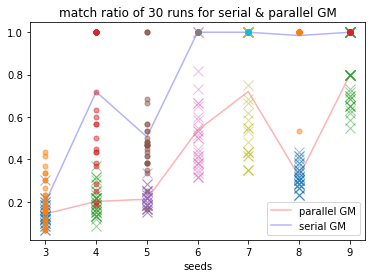

In [58]:
plt.plot(range(3,10),avg_par,'r-',alpha=0.3)
plt.plot(range(3,10),avg_gmp,'b-',alpha=0.3)
for i in range(3,10):
    x=np.array([i]*30)
    plt.plot(x,results_par[i],'x',alpha=0.5,ms=10)
    plt.plot(x,results_gmp[i],'o',alpha=0.5,ms=5)

plt.xlabel('seeds')
plt.legend(['parallel GM','serial GM'])
plt.title('match ratio of 30 runs for serial & parallel GM')

### for the plots on the slides:

In [10]:
results_gmp=[]
results_par=[]

for i in range(30):
    avg_gmp=[]
    np.random.seed(i)
    block_members = np.array(3 * [20])
    n_verts = block_members.sum()
    block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])
    A1, A2 = sbm_corr(block_members, block_probs, 0.5, directed=False, loops=False)
    # shuffle for testing
    node_shuffle_input = np.random.permutation(n_verts)
    A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
    node_unshuffle_input = np.array(range(n_verts))
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    W1 = np.sort(random.sample(list(range(n_verts)),3))
    W1 = W1.astype(int)
    W2 = np.array(node_unshuffle_input[W1])
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    n_init = 10  # parameter for GMP
        
    sgm = GMP(n_init=n_init, init_method="rand")
    sgm = sgm.fit(A1, A2_shuffle,W1,W2)

    sgm_par = GraphMatch(n_init=n_init, init_method="rand")
    sgm_par = sgm_par.fit(A1, A2_shuffle,W1,W2)

    match_ratio = 1 - (np.count_nonzero(abs(sgm.perm_inds_ - node_unshuffle_input)) / n_verts)
    match_rat = 1 - (np.count_nonzero(abs(sgm_par.perm_inds_ - node_unshuffle_input)) / n_verts)
    results_gmp.append(match_ratio)
    results_par.append(match_rat)

In [98]:
t_gmp=[]
t_par=[]
results_gmp=[]
results_par=[]
for j in range(15):
    for i in range(3,10):
        np.random.seed(i)
        block_members = np.array(3 * [20])
        n_verts = block_members.sum()
        block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])
        A1, A2 = sbm_corr(block_members, block_probs, 0.5, directed=False, loops=False)
        # shuffle for testing
        node_shuffle_input = np.random.permutation(n_verts)
        A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
        node_unshuffle_input = np.array(range(n_verts))
        node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

        W1 = np.sort(random.sample(list(range(n_verts)),i))
        W1 = W1.astype(int)
        W2 = np.array(node_unshuffle_input[W1])
        node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    
        n_init = 10  # parameter for GMP
        currtime = timeit.default_timer()   
        sgm = GMP(n_init=n_init, init_method="rand")
        sgm = sgm.fit(A1, A2_shuffle,W1,W2)
        t=timeit.default_timer() - currtime
        t_gmp.append(t)

        ctime = timeit.default_timer()
        sgm_par = GraphMatch(n_init=n_init, init_method="rand")
        sgm_par = sgm_par.fit(A1, A2_shuffle,W1,W2)
        tpar=timeit.default_timer() - ctime
        t_par.append(tpar)

        match_ratio = 1 - (np.count_nonzero(abs(sgm.perm_inds_ - node_unshuffle_input)) / n_verts)
        match_rat = 1 - (np.count_nonzero(abs(sgm_par.perm_inds_ - node_unshuffle_input)) / n_verts)
        results_gmp.append(match_ratio)
        results_par.append(match_rat)

In [12]:
for i in range(30):
    avg_gmp=[]
    np.random.seed(i)
    block_members = np.array(3 * [20])
    n_verts = block_members.sum()
    block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])
    A1, A2 = sbm_corr(block_members, block_probs, 0.5, directed=False, loops=False)
    # shuffle for testing
    node_shuffle_input = np.random.permutation(n_verts)
    A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
    node_unshuffle_input = np.array(range(n_verts))
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    W1 = np.sort(random.sample(list(range(n_verts)),4))
    W1 = W1.astype(int)
    W2 = np.array(node_unshuffle_input[W1])
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    n_init = 10  # parameter for GMP
        
    sgm = GMP(n_init=n_init, init_method="rand")
    sgm = sgm.fit(A1, A2_shuffle,W1,W2)

    sgm_par = GraphMatch(n_init=n_init, init_method="rand")
    sgm_par = sgm_par.fit(A1, A2_shuffle,W1,W2)

    match_ratio = 1 - (np.count_nonzero(abs(sgm.perm_inds_ - node_unshuffle_input)) / n_verts)
    match_rat = 1 - (np.count_nonzero(abs(sgm_par.perm_inds_ - node_unshuffle_input)) / n_verts)
    results_gmp.append(match_ratio)
    results_par.append(match_rat)

In [14]:
for i in range(30):
    avg_gmp=[]
    np.random.seed(i)
    block_members = np.array(3 * [20])
    n_verts = block_members.sum()
    block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])
    A1, A2 = sbm_corr(block_members, block_probs, 0.5, directed=False, loops=False)
    # shuffle for testing
    node_shuffle_input = np.random.permutation(n_verts)
    A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
    node_unshuffle_input = np.array(range(n_verts))
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    W1 = np.sort(random.sample(list(range(n_verts)),5))
    W1 = W1.astype(int)
    W2 = np.array(node_unshuffle_input[W1])
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    n_init = 10  # parameter for GMP
        
    sgm = GMP(n_init=n_init, init_method="rand")
    sgm = sgm.fit(A1, A2_shuffle,W1,W2)

    sgm_par = GraphMatch(n_init=n_init, init_method="rand")
    sgm_par = sgm_par.fit(A1, A2_shuffle,W1,W2)

    match_ratio = 1 - (np.count_nonzero(abs(sgm.perm_inds_ - node_unshuffle_input)) / n_verts)
    match_rat = 1 - (np.count_nonzero(abs(sgm_par.perm_inds_ - node_unshuffle_input)) / n_verts)
    results_gmp.append(match_ratio)
    results_par.append(match_rat)

In [18]:
for i in range(30):
    avg_gmp=[]
    np.random.seed(i)
    block_members = np.array(3 * [20])
    n_verts = block_members.sum()
    block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])
    A1, A2 = sbm_corr(block_members, block_probs, 0.5, directed=False, loops=False)
    # shuffle for testing
    node_shuffle_input = np.random.permutation(n_verts)
    A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
    node_unshuffle_input = np.array(range(n_verts))
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    W1 = np.sort(random.sample(list(range(n_verts)),6))
    W1 = W1.astype(int)
    W2 = np.array(node_unshuffle_input[W1])
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    n_init = 10  # parameter for GMP
        
    sgm = GMP(n_init=n_init, init_method="rand")
    sgm = sgm.fit(A1, A2_shuffle,W1,W2)

    sgm_par = GraphMatch(n_init=n_init, init_method="rand")
    sgm_par = sgm_par.fit(A1, A2_shuffle,W1,W2)

    match_ratio = 1 - (np.count_nonzero(abs(sgm.perm_inds_ - node_unshuffle_input)) / n_verts)
    match_rat = 1 - (np.count_nonzero(abs(sgm_par.perm_inds_ - node_unshuffle_input)) / n_verts)
    results_gmp.append(match_ratio)
    results_par.append(match_rat)

In [20]:
for i in range(30):
    avg_gmp=[]
    np.random.seed(i)
    block_members = np.array(3 * [20])
    n_verts = block_members.sum()
    block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])
    A1, A2 = sbm_corr(block_members, block_probs, 0.5, directed=False, loops=False)
    # shuffle for testing
    node_shuffle_input = np.random.permutation(n_verts)
    A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
    node_unshuffle_input = np.array(range(n_verts))
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    W1 = np.sort(random.sample(list(range(n_verts)),7))
    W1 = W1.astype(int)
    W2 = np.array(node_unshuffle_input[W1])
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    n_init = 10  # parameter for GMP
        
    sgm = GMP(n_init=n_init, init_method="rand")
    sgm = sgm.fit(A1, A2_shuffle,W1,W2)

    sgm_par = GraphMatch(n_init=n_init, init_method="rand")
    sgm_par = sgm_par.fit(A1, A2_shuffle,W1,W2)

    match_ratio = 1 - (np.count_nonzero(abs(sgm.perm_inds_ - node_unshuffle_input)) / n_verts)
    match_rat = 1 - (np.count_nonzero(abs(sgm_par.perm_inds_ - node_unshuffle_input)) / n_verts)
    results_gmp.append(match_ratio)
    results_par.append(match_rat)

In [22]:
for i in range(30):
    avg_gmp=[]
    np.random.seed(i)
    block_members = np.array(3 * [20])
    n_verts = block_members.sum()
    block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])
    A1, A2 = sbm_corr(block_members, block_probs, 0.5, directed=False, loops=False)
    # shuffle for testing
    node_shuffle_input = np.random.permutation(n_verts)
    A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
    node_unshuffle_input = np.array(range(n_verts))
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    W1 = np.sort(random.sample(list(range(n_verts)),8))
    W1 = W1.astype(int)
    W2 = np.array(node_unshuffle_input[W1])
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    n_init = 10  # parameter for GMP
        
    sgm = GMP(n_init=n_init, init_method="rand")
    sgm = sgm.fit(A1, A2_shuffle,W1,W2)

    sgm_par = GraphMatch(n_init=n_init, init_method="rand")
    sgm_par = sgm_par.fit(A1, A2_shuffle,W1,W2)

    match_ratio = 1 - (np.count_nonzero(abs(sgm.perm_inds_ - node_unshuffle_input)) / n_verts)
    match_rat = 1 - (np.count_nonzero(abs(sgm_par.perm_inds_ - node_unshuffle_input)) / n_verts)
    results_gmp.append(match_ratio)
    results_par.append(match_rat)

In [24]:
for i in range(30):
    avg_gmp=[]
    np.random.seed(i)
    block_members = np.array(3 * [20])
    n_verts = block_members.sum()
    block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])
    A1, A2 = sbm_corr(block_members, block_probs, 0.5, directed=False, loops=False)
    # shuffle for testing
    node_shuffle_input = np.random.permutation(n_verts)
    A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
    node_unshuffle_input = np.array(range(n_verts))
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    W1 = np.sort(random.sample(list(range(n_verts)),9))
    W1 = W1.astype(int)
    W2 = np.array(node_unshuffle_input[W1])
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    n_init = 10  # parameter for GMP
        
    sgm = GMP(n_init=n_init, init_method="rand")
    sgm = sgm.fit(A1, A2_shuffle,W1,W2)

    sgm_par = GraphMatch(n_init=n_init, init_method="rand")
    sgm_par = sgm_par.fit(A1, A2_shuffle,W1,W2)

    match_ratio = 1 - (np.count_nonzero(abs(sgm.perm_inds_ - node_unshuffle_input)) / n_verts)
    match_rat = 1 - (np.count_nonzero(abs(sgm_par.perm_inds_ - node_unshuffle_input)) / n_verts)
    results_gmp.append(match_ratio)
    results_par.append(match_rat)

In [26]:
for i in range(30):
    avg_gmp=[]
    np.random.seed(i)
    block_members = np.array(3 * [20])
    n_verts = block_members.sum()
    block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])
    A1, A2 = sbm_corr(block_members, block_probs, 0.5, directed=False, loops=False)
    # shuffle for testing
    node_shuffle_input = np.random.permutation(n_verts)
    A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
    node_unshuffle_input = np.array(range(n_verts))
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    W1 = np.sort(random.sample(list(range(n_verts)),10))
    W1 = W1.astype(int)
    W2 = np.array(node_unshuffle_input[W1])
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    n_init = 10  # parameter for GMP
        
    sgm = GMP(n_init=n_init, init_method="rand")
    sgm = sgm.fit(A1, A2_shuffle,W1,W2)

    sgm_par = GraphMatch(n_init=n_init, init_method="rand")
    sgm_par = sgm_par.fit(A1, A2_shuffle,W1,W2)

    match_ratio = 1 - (np.count_nonzero(abs(sgm.perm_inds_ - node_unshuffle_input)) / n_verts)
    match_rat = 1 - (np.count_nonzero(abs(sgm_par.perm_inds_ - node_unshuffle_input)) / n_verts)
    results_gmp.append(match_ratio)
    results_par.append(match_rat)

In [27]:
np.shape(results_par)

(240,)

In [42]:
r_par=np.reshape(results_par,[8,30])
r_gmp=np.reshape(results_gmp,[8,30])

In [44]:
mean_par=np.mean(r_par,axis=1)
mean_gmp=np.mean(r_gmp,axis=1)
mean_par,mean_gmp

(array([0.135     , 0.16111111, 0.255     , 0.43277778, 0.545     ,
        0.73166667, 0.88      , 0.95333333]),
 array([0.495     , 0.73277778, 0.83055556, 0.95777778, 0.99722222,
        0.99888889, 0.99722222, 0.99722222]))

Text(0.5, 1.0, 'match ratio of 30 runs for serial & parallel GM')

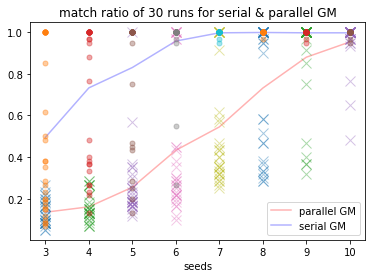

In [46]:
plt.plot(range(3,11),mean_par,'r-',alpha=0.3)
plt.plot(range(3,11),mean_gmp,'b-',alpha=0.3)
for i in range(3,11):
    x=np.array([i]*30)
    plt.plot(x,r_par[i-3],'x',alpha=0.4,ms=10)
    plt.plot(x,r_gmp[i-3],'o',alpha=0.4,ms=5)

plt.xlabel('seeds')
plt.legend(['parallel GM','serial GM'])
plt.title('match ratio of 30 runs for serial & parallel GM')

In [47]:
import timeit

In [54]:
t_gmp=[]
t_par=[]
for i in range(30):
    np.random.seed(i)
    block_members = np.array(3 * [20])
    n_verts = block_members.sum()
    block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])
    A1, A2 = sbm_corr(block_members, block_probs, 0.5, directed=False, loops=False)
    # shuffle for testing
    node_shuffle_input = np.random.permutation(n_verts)
    A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
    node_unshuffle_input = np.array(range(n_verts))
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    W1 = np.sort(random.sample(list(range(n_verts)),3))
    W1 = W1.astype(int)
    W2 = np.array(node_unshuffle_input[W1])
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    
    n_init = 10  # parameter for GMP
    currtime = timeit.default_timer()   
    sgm = GMP(n_init=n_init, init_method="rand")
    sgm = sgm.fit(A1, A2_shuffle,W1,W2)
    t=timeit.default_timer() - currtime
    t_gmp.append(t)

    ctime = timeit.default_timer()
    sgm_par = GraphMatch(n_init=n_init, init_method="rand")
    sgm_par = sgm_par.fit(A1, A2_shuffle,W1,W2)
    tpar=timeit.default_timer() - ctime
    t_par.append(tpar)
    

In [55]:
np.shape(t_gmp),np.shape(t_par)

((30,), (30,))

In [56]:
for i in range(30):
    np.random.seed(i)
    block_members = np.array(3 * [20])
    n_verts = block_members.sum()
    block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])
    A1, A2 = sbm_corr(block_members, block_probs, 0.5, directed=False, loops=False)
    # shuffle for testing
    node_shuffle_input = np.random.permutation(n_verts)
    A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
    node_unshuffle_input = np.array(range(n_verts))
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    W1 = np.sort(random.sample(list(range(n_verts)),4))
    W1 = W1.astype(int)
    W2 = np.array(node_unshuffle_input[W1])
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    
    n_init = 10  # parameter for GMP
    currtime = timeit.default_timer()   
    sgm = GMP(n_init=n_init, init_method="rand")
    sgm = sgm.fit(A1, A2_shuffle,W1,W2)
    t=timeit.default_timer() - currtime
    t_gmp.append(t)

    ctime = timeit.default_timer()
    sgm_par = GraphMatch(n_init=n_init, init_method="rand")
    sgm_par = sgm_par.fit(A1, A2_shuffle,W1,W2)
    tpar=timeit.default_timer() - ctime
    t_par.append(tpar)

In [57]:
np.shape(t_gmp),np.shape(t_par)

((60,), (60,))

In [58]:
for i in range(30):
    np.random.seed(i)
    block_members = np.array(3 * [20])
    n_verts = block_members.sum()
    block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])
    A1, A2 = sbm_corr(block_members, block_probs, 0.5, directed=False, loops=False)
    # shuffle for testing
    node_shuffle_input = np.random.permutation(n_verts)
    A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
    node_unshuffle_input = np.array(range(n_verts))
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    W1 = np.sort(random.sample(list(range(n_verts)),5))
    W1 = W1.astype(int)
    W2 = np.array(node_unshuffle_input[W1])
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    
    n_init = 10  # parameter for GMP
    currtime = timeit.default_timer()   
    sgm = GMP(n_init=n_init, init_method="rand")
    sgm = sgm.fit(A1, A2_shuffle,W1,W2)
    t=timeit.default_timer() - currtime
    t_gmp.append(t)

    ctime = timeit.default_timer()
    sgm_par = GraphMatch(n_init=n_init, init_method="rand")
    sgm_par = sgm_par.fit(A1, A2_shuffle,W1,W2)
    tpar=timeit.default_timer() - ctime
    t_par.append(tpar)

In [59]:
np.shape(t_gmp),np.shape(t_par)

((90,), (90,))

In [60]:
for i in range(30):
    np.random.seed(i)
    block_members = np.array(3 * [20])
    n_verts = block_members.sum()
    block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])
    A1, A2 = sbm_corr(block_members, block_probs, 0.5, directed=False, loops=False)
    # shuffle for testing
    node_shuffle_input = np.random.permutation(n_verts)
    A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
    node_unshuffle_input = np.array(range(n_verts))
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    W1 = np.sort(random.sample(list(range(n_verts)),6))
    W1 = W1.astype(int)
    W2 = np.array(node_unshuffle_input[W1])
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    
    n_init = 10  # parameter for GMP
    currtime = timeit.default_timer()   
    sgm = GMP(n_init=n_init, init_method="rand")
    sgm = sgm.fit(A1, A2_shuffle,W1,W2)
    t=timeit.default_timer() - currtime
    t_gmp.append(t)

    ctime = timeit.default_timer()
    sgm_par = GraphMatch(n_init=n_init, init_method="rand")
    sgm_par = sgm_par.fit(A1, A2_shuffle,W1,W2)
    tpar=timeit.default_timer() - ctime
    t_par.append(tpar)

In [61]:
np.shape(t_gmp),np.shape(t_par)

((120,), (120,))

In [62]:
for i in range(30):
    np.random.seed(i)
    block_members = np.array(3 * [20])
    n_verts = block_members.sum()
    block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])
    A1, A2 = sbm_corr(block_members, block_probs, 0.5, directed=False, loops=False)
    # shuffle for testing
    node_shuffle_input = np.random.permutation(n_verts)
    A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
    node_unshuffle_input = np.array(range(n_verts))
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    W1 = np.sort(random.sample(list(range(n_verts)),7))
    W1 = W1.astype(int)
    W2 = np.array(node_unshuffle_input[W1])
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    
    n_init = 10  # parameter for GMP
    currtime = timeit.default_timer()   
    sgm = GMP(n_init=n_init, init_method="rand")
    sgm = sgm.fit(A1, A2_shuffle,W1,W2)
    t=timeit.default_timer() - currtime
    t_gmp.append(t)

    ctime = timeit.default_timer()
    sgm_par = GraphMatch(n_init=n_init, init_method="rand")
    sgm_par = sgm_par.fit(A1, A2_shuffle,W1,W2)
    tpar=timeit.default_timer() - ctime
    t_par.append(tpar)

In [63]:
np.shape(t_gmp),np.shape(t_par)

((150,), (150,))

In [64]:
for i in range(30):
    np.random.seed(i)
    block_members = np.array(3 * [20])
    n_verts = block_members.sum()
    block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])
    A1, A2 = sbm_corr(block_members, block_probs, 0.5, directed=False, loops=False)
    # shuffle for testing
    node_shuffle_input = np.random.permutation(n_verts)
    A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
    node_unshuffle_input = np.array(range(n_verts))
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    W1 = np.sort(random.sample(list(range(n_verts)),8))
    W1 = W1.astype(int)
    W2 = np.array(node_unshuffle_input[W1])
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    
    n_init = 10  # parameter for GMP
    currtime = timeit.default_timer()   
    sgm = GMP(n_init=n_init, init_method="rand")
    sgm = sgm.fit(A1, A2_shuffle,W1,W2)
    t=timeit.default_timer() - currtime
    t_gmp.append(t)

    ctime = timeit.default_timer()
    sgm_par = GraphMatch(n_init=n_init, init_method="rand")
    sgm_par = sgm_par.fit(A1, A2_shuffle,W1,W2)
    tpar=timeit.default_timer() - ctime
    t_par.append(tpar)

In [65]:
np.shape(t_gmp),np.shape(t_par)

((180,), (180,))

In [66]:
for i in range(30):
    np.random.seed(i)
    block_members = np.array(3 * [20])
    n_verts = block_members.sum()
    block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])
    A1, A2 = sbm_corr(block_members, block_probs, 0.5, directed=False, loops=False)
    # shuffle for testing
    node_shuffle_input = np.random.permutation(n_verts)
    A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
    node_unshuffle_input = np.array(range(n_verts))
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    W1 = np.sort(random.sample(list(range(n_verts)),9))
    W1 = W1.astype(int)
    W2 = np.array(node_unshuffle_input[W1])
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    
    n_init = 10  # parameter for GMP
    currtime = timeit.default_timer()   
    sgm = GMP(n_init=n_init, init_method="rand")
    sgm = sgm.fit(A1, A2_shuffle,W1,W2)
    t=timeit.default_timer() - currtime
    t_gmp.append(t)

    ctime = timeit.default_timer()
    sgm_par = GraphMatch(n_init=n_init, init_method="rand")
    sgm_par = sgm_par.fit(A1, A2_shuffle,W1,W2)
    tpar=timeit.default_timer() - ctime
    t_par.append(tpar)

In [67]:
np.shape(t_gmp),np.shape(t_par)

((210,), (210,))

In [68]:
for i in range(30):
    np.random.seed(i)
    block_members = np.array(3 * [20])
    n_verts = block_members.sum()
    block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])
    A1, A2 = sbm_corr(block_members, block_probs, 0.5, directed=False, loops=False)
    # shuffle for testing
    node_shuffle_input = np.random.permutation(n_verts)
    A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
    node_unshuffle_input = np.array(range(n_verts))
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    W1 = np.sort(random.sample(list(range(n_verts)),10))
    W1 = W1.astype(int)
    W2 = np.array(node_unshuffle_input[W1])
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    
    n_init = 10  # parameter for GMP
    currtime = timeit.default_timer()   
    sgm = GMP(n_init=n_init, init_method="rand")
    sgm = sgm.fit(A1, A2_shuffle,W1,W2)
    t=timeit.default_timer() - currtime
    t_gmp.append(t)

    ctime = timeit.default_timer()
    sgm_par = GraphMatch(n_init=n_init, init_method="rand")
    sgm_par = sgm_par.fit(A1, A2_shuffle,W1,W2)
    tpar=timeit.default_timer() - ctime
    t_par.append(tpar)

In [69]:
np.shape(t_gmp),np.shape(t_par)

((240,), (240,))

In [74]:
time_par=np.reshape(t_par,[8,30])
time_gmp=np.reshape(t_gmp,[8,30])
time_par-time_gmp

array([[0.55807265, 0.61304835, 0.59848555, 0.72883933, 0.72447707,
        0.62020805, 0.7122682 , 0.64098509, 0.62645213, 0.61035704,
        0.81457472, 0.56489021, 0.68855978, 0.75629636, 0.54775472,
        0.73099088, 0.90308762, 0.55851572, 0.90191787, 0.83885585,
        0.68608935, 0.914883  , 0.64909186, 0.80771964, 0.50544069,
        0.71451163, 0.46142099, 0.65887757, 0.96134546, 0.84156282],
       [0.91742551, 0.67661341, 0.56768525, 0.74603589, 0.76813398,
        0.82207514, 0.69732042, 0.63930795, 0.6185878 , 0.73753123,
        0.86168863, 0.92021213, 0.92456146, 0.81798917, 0.62550987,
        0.8442056 , 0.49708451, 0.84555088, 0.67866877, 0.47795536,
        0.60197242, 0.57470611, 0.53026004, 0.50431568, 0.61740415,
        0.56469849, 0.57472548, 0.58970813, 0.54065014, 0.52862166],
       [0.77598838, 0.6289294 , 0.59627112, 0.57026648, 0.5918011 ,
        0.58811706, 0.5309091 , 0.56879002, 0.53066363, 0.56274526,
        0.38724602, 0.5148155 , 0.50081754, 0.

In [71]:
tmean_par=np.mean(time_par,axis=1)
tmean_gmp=np.mean(time_gmp,axis=1)
tmean_par,tmean_gmp

(array([1.82745113, 1.73959157, 1.52835961, 1.50731806, 1.52494125,
        1.49737036, 1.56774391, 1.62235616]),
 array([1.12946512, 1.0625514 , 0.96797055, 0.93273616, 0.90559386,
        0.84317639, 0.85751195, 0.86456093]))

Text(0.5, 1.0, 'running time of 30 runs for serial & parallel GM')

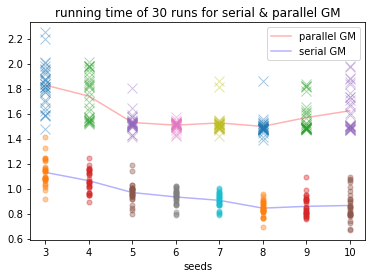

In [72]:
plt.plot(range(3,11),tmean_par,'r-',alpha=0.3)
plt.plot(range(3,11),tmean_gmp,'b-',alpha=0.3)
for i in range(3,11):
    x=np.array([i]*30)
    plt.plot(x,time_par[i-3],'x',alpha=0.4,ms=10)
    plt.plot(x,time_gmp[i-3],'o',alpha=0.4,ms=5)

plt.xlabel('seeds')
plt.legend(['parallel GM','serial GM'])
plt.title('running time of 30 runs for serial & parallel GM')